迭代次数       | 当前 w 值          | 当前梯度            | 新 w 值
------------------------------------------------------------
1          | 1.0000          | 8.0000          | 0.2000
2          | 0.2000          | 3.2000          | -0.1200
3          | -0.1200         | 1.2800          | -0.2480
4          | -0.2480         | 0.5120          | -0.2992
5          | -0.2992         | 0.2048          | -0.3197
6          | -0.3197         | 0.0819          | -0.3279
7          | -0.3279         | 0.0328          | -0.3311
8          | -0.3311         | 0.0131          | -0.3325
9          | -0.3325         | 0.0052          | -0.3330
10         | -0.3330         | 0.0021          | -0.3332

最终结果: w 约为 -0.3332 (理论最小值为 -0.3333)


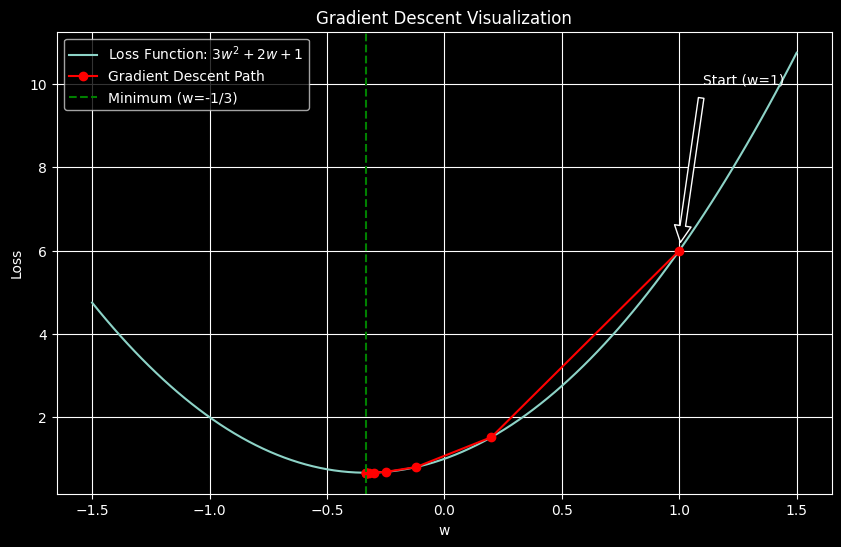

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. 定义函数和梯度
# ==========================================

def loss_function(w):
    """
    计算损失值: L = 3w^2 + 2w + 1
    """
    return 3 * w**2 + 2 * w + 1

def gradient(w):
    """
    计算梯度 (导数): dL/dw = 6w + 2
    """
    return 6 * w + 2

# ==========================================
# 2. 梯度下降核心算法
# ==========================================

def gradient_descent(start_w, learning_rate, iterations):
    # 记录历史数据用于绘图
    w_history = [start_w]
    loss_history = [loss_function(start_w)]

    current_w = start_w

    print(f"{'迭代次数':<10} | {'当前 w 值':<15} | {'当前梯度':<15} | {'新 w 值'}")
    print("-" * 60)

    for i in range(iterations):
        # A. 计算当前梯度
        grad = gradient(current_w)

        # B. 更新 w (核心公式: w = w - lr * grad)
        next_w = current_w - learning_rate * grad

        # 打印过程
        print(f"{i+1:<10} | {current_w:<15.4f} | {grad:<15.4f} | {next_w:.4f}")

        # 更新当前 w
        current_w = next_w

        # 记录数据
        w_history.append(current_w)
        loss_history.append(loss_function(current_w))

    return w_history, loss_history

# ==========================================
# 3. 运行示例
# ==========================================

# 设置参数
initial_w = 1.0       # 题目要求的起始点
learning_rate = 0.1   # 学习率 (步长)
iterations = 10       # 迭代次数

# 执行梯度下降
w_history, loss_history = gradient_descent(initial_w, learning_rate, iterations)

print(f"\n最终结果: w 约为 {w_history[-1]:.4f} (理论最小值为 -0.3333)")

# ==========================================
# 4. 可视化结果 (可选，但推荐)
# ==========================================
# 创建用于画底图的 x 轴数据
w_values = np.linspace(-1.5, 1.5, 100)
loss_values = loss_function(w_values)

plt.figure(figsize=(10, 6))

# 画出原本的损失函数曲线 (蓝色线)
plt.plot(w_values, loss_values, label='Loss Function: $3w^2 + 2w + 1$')

# 画出梯度下降的移动路径 (红色点和线)
plt.plot(w_history, loss_history, 'ro-', label='Gradient Descent Path')

# 标记起始点
plt.annotate('Start (w=1)', xy=(1, loss_function(1)), xytext=(1.1, 10),
             arrowprops=dict(facecolor='black', shrink=0.05))

# 标记最低点
plt.axvline(x=-1/3, color='g', linestyle='--', label='Minimum (w=-1/3)')

plt.title('Gradient Descent Visualization')
plt.xlabel('w')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

学习率选取

In [2]:
def gradient(w):
    return 6 * w + 2

current_w = 1.0  # 起始点
grad = gradient(current_w) # 梯度 = 8

print(f"起始位置 w = 1.0, 目标最低点 w = -0.333\n")

# --- 模拟三种情况 ---

# 1. 学习率 0.1
w_new = current_w - 0.1 * grad
print(f"学习率 0.1   -> 迈步 0.8   -> 新 w = {w_new:.3f} (很棒，靠近目标)")

# 2. 学习率 0.01
w_new = current_w - 0.01 * grad
print(f"学习率 0.01  -> 迈步 0.08  -> 新 w = {w_new:.3f} (太慢了)")

# 3. 学习率 0.5
w_new = current_w - 0.5 * grad
print(f"学习率 0.5   -> 迈步 4.0   -> 新 w = {w_new:.3f} (完蛋，跨飞了)")

起始位置 w = 1.0, 目标最低点 w = -0.333

学习率 0.1   -> 迈步 0.8   -> 新 w = 0.200 (很棒，靠近目标)
学习率 0.01  -> 迈步 0.08  -> 新 w = 0.920 (太慢了)
学习率 0.5   -> 迈步 4.0   -> 新 w = -3.000 (完蛋，跨飞了)


In [3]:
def get_gradient(w):
    return 6 * w + 2

def get_second_derivative():
    return 6  # 3w^2 求两次导数就是 6

# === 场景 1: 普通梯度下降 (Blindly Walking) ===
w = 1.0
lr = 0.1
print("--- 普通梯度下降 (lr=0.1) ---")
for i in range(3):
    grad = get_gradient(w)
    w = w - lr * grad
    print(f"第 {i+1} 步: w = {w:.4f}")

print("\n--- 牛顿法 (利用二阶导数) ---")
# === 场景 2: 牛顿法 (One-Step Jump) ===
w = 1.0  # 重置起点
grad = get_gradient(w)          # 一阶导
hessian = get_second_derivative() # 二阶导

# 牛顿法公式: w = w - (f' / f'')
w = w - (grad / hessian)

print(f"第 1 步: w = {w:.4f} (直接命中理论最低点 -0.3333!)")

--- 普通梯度下降 (lr=0.1) ---
第 1 步: w = 0.2000
第 2 步: w = -0.1200
第 3 步: w = -0.2480

--- 牛顿法 (利用二阶导数) ---
第 1 步: w = -0.3333 (直接命中理论最低点 -0.3333!)


In [9]:
from sklearn.linear_model import SGDRegressor
# 导入 SGD 回归算法
from sklearn.linear_model import SGDRegressor

# 导入 均方误差 评估工具
from sklearn.metrics import mean_squared_error

In [11]:
# ==========================================
# 0. 补充导包
# ==========================================
from sklearn.datasets import fetch_california_housing  # 或者 load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# ==========================================
# 1. 准备数据 (买菜)
# ==========================================
# 加载房价数据
housing = fetch_california_housing()
x = housing.data
y = housing.target

# ==========================================
# 2. 切分数据 (切菜)
# ==========================================
# 把数据切分成：训练集(train) 和 测试集(test)
# 这里的 x_train 就是你报错缺失的那个变量！
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# ==========================================
# 3. 数据标准化 (洗菜 - 非常重要！)
# ==========================================
# 梯度下降对数据的范围非常敏感，必须进行标准化
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

# 目标值 y 也通常需要标准化（根据你代码注释里的 std_y 推测你需要这一步）
std_y = StandardScaler()
y_train = std_y.fit_transform(y_train.reshape(-1, 1))
y_test = std_y.transform(y_test.reshape(-1, 1))

# y_train 转换后是二维数组，SGD fit的时候最好转回一维
y_train = y_train.ravel()
y_test = y_test.ravel()

print("数据准备完毕！x_train 现在的形状是:", x_train.shape)

数据准备完毕！x_train 现在的形状是: (15480, 8)


In [12]:
# 梯度下降去进行房价预测，数据量大要用这个
# learning_rate的不同方式，代表学习率变化的算法不一样，比如constant,invscaling,adaptive
# 默认可以去调 eta0 = 0.008，会改变learning_rate的初始值
# learning_rate='optimal',alpha是正则化力度，但是会影响学习率的值，由alpha来算学习率
# penalty代表正则化，分为l1和l2
# eta0=0.01, penalty='l2',max_iter=1000
sgd = SGDRegressor(eta0=0.01,penalty='l2', max_iter=1000)
# # 训练
sgd.fit(x_train, y_train)
#
print('梯度下降的回归系数', sgd.coef_)
#
# 预测测试集的房子价格
# y_sgd_predict = std_y.inverse_transform(sgd.predict(x_test).reshape(-1, 1))
y_predict = sgd.predict(x_test)
# print("梯度下降测试集里面每个房子的预测价格：", y_sgd_predict)
print("梯度下降的均方误差：", mean_squared_error(y_test, y_predict))
# print("梯度下降的原始房价量纲均方误差：", mean_squared_error(std_y.inverse_transform(y_test), y_sgd_predict))

梯度下降的回归系数 [ 0.73101814  0.08873468 -0.27929165  0.26694962 -0.00389072 -0.11456161
 -0.77533512 -0.74832459]
梯度下降的均方误差： 0.3961573195994207


In [13]:
w=1
learning_rate=0.1 # 这里是学习率，可以调节
def loss(w):
    return 2*w**2+3*w+2
def dao_shu(w):
    return 4*w+3
for i in range(30):
    w=w-learning_rate*dao_shu(w)
    print(f'w {w} 损失{loss(w)}')

w 0.29999999999999993 损失3.0799999999999996
w -0.12 损失1.6688
w -0.372 损失1.160768
w -0.5232 损失0.9778764800000002
w -0.61392 损失0.9120355328
w -0.6683520000000001 损失0.888332791808
w -0.7010112000000001 损失0.87979980505088
w -0.72060672 损失0.8767279298183168
w -0.732364032 损失0.8756220547345941
w -0.7394184192 损失0.8752239397044537
w -0.74365105152 损失0.8750806182936035
w -0.746190630912 损失0.8750290225856971
w -0.7477143785472 损失0.8750104481308509
w -0.74862862712832 损失0.8750037613271064
w -0.749177176276992 损失0.8750013540777584
w -0.7495063057661951 损失0.8750004874679931
w -0.7497037834597171 损失0.8750001754884773
w -0.7498222700758302 损失0.8750000631758519
w -0.7498933620454982 损失0.8750000227433066
w -0.7499360172272989 损失0.8750000081875902
w -0.7499616103363793 损失0.8750000029475327
w -0.7499769662018276 损失0.8750000010611116
w -0.7499861797210966 损失0.8750000003820002
w -0.749991707832658 损失0.87500000013752
w -0.7499950246995948 损失0.8750000000495071
w -0.7499970148197569 损失0.8750000000178226
w -0.

In [18]:
from sklearn.linear_model import Ridge
# # # 岭回归去进行房价预测
# 岭回归是对线性回归加入L2正则化，L2正则化是对系数的平方和进行惩罚
# alpha就是补偿的系数
# 正规方程求解，加补偿就可以让正规方程可逆
rd = Ridge(alpha=0.01)

rd.fit(x_train, y_train)

print(rd.coef_)

# # 预测测试集的房子价格
print(rd.predict(x_test).shape)
# y_rd_predict = std_y.inverse_transform(rd.predict(x_test))
y_predict = rd.predict(x_test)
# print("岭回归里面每个房子的预测价格：", y_rd_predict)

print("岭回归的均方误差：", mean_squared_error(y_test, y_predict))
# print("岭回归的均方误差：", mean_squared_error(std_y.inverse_transform(y_test), y_rd_predict))

[ 0.73767526  0.10445285 -0.26153285  0.30178793 -0.00142355 -0.03563561
 -0.77319649 -0.75128838]
(5160,)
岭回归的均方误差： 0.4055477794410946


岭回归与lasso回归

In [16]:
from sklearn.linear_model import Ridge, Lasso

# 1. 岭回归 (如果你不想删减特征)
# alpha 越大，惩罚越狠，系数越接近 0
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)

# 2. Lasso 回归 (如果你想自动筛选特征)
# alpha 越大，变成 0 的特征越多
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)

# 看看 Lasso 把哪些特征干掉了 (系数为 0 的)
print("Lasso 的系数:", lasso_model.coef_)

Lasso 的系数: [ 0.59774021  0.07518793 -0.          0.         -0.         -0.
 -0.         -0.        ]


In [17]:
# # # Lasso 回归去进行房价预测
#alpha就是补偿的系数
print(x_train.shape)
print(y_train.shape)
ls = Lasso(alpha=0.001)

ls.fit(x_train, y_train)

print(ls.coef_)

# # 预测测试集的房子价格
print(ls.predict(x_test).shape)
print('-'*50)
# y_ls_predict = std_y.inverse_transform(ls.predict(x_test).reshape(-1, 1))
y_predict = ls.predict(x_test)
# print("Lasso回归里面每个房子的预测价格：", y_rd_predict)

print("Lasso回归的均方误差：", mean_squared_error(y_test, y_predict))
# print("Lasso回归的均方误差：", mean_squared_error(std_y.inverse_transform(y_test), y_ls_predict))

(15480, 8)
(15480,)
[ 7.32362121e-01  1.05255629e-01 -2.48015048e-01  2.88216177e-01
 -1.74624200e-04 -3.46886292e-02 -7.62261440e-01 -7.39687160e-01]
(5160,)
--------------------------------------------------
Lasso回归的均方误差： 0.4045663920429236
